These metrics are as follows:

id -- ID order items

order_id -- ID Order (tabel)

user_id -- ID User (tabel)

product_id -- ID Product (tabel)

inventory_item_id -- ID Inventory Item (tabel)

status -- Status Order

created_at -- Waktu yang dicatat saat order dipesan

shipped_at -- Waktu yang dicatat saat  order dikemas 

delivered_at -- Waktu yang dicatat saat  order dikirim

returned_at -- Waktu yang dicatat saat order dikembalikan oleh User

sale_price -- Harga jual barang ($)



### 1 Import Package


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#import Library

import matplotlib.pyplot as plt #untuk visualisasi
import numpy as np #numpy untuk mengolah angka, number py
import pandas as pd #untuk mengolah data
import seaborn as sns #untuk visualisasi

plt.style.use("fivethirtyeight")
print("Import Library berhasil ")

Import Library berhasil 


## 2 Import dataset

In [3]:
#Import data

df_f = pd.read_csv("/content/drive/MyDrive/Final project/Guidelines/dataset/data_status Complete.csv")
df_p = pd.read_csv("/content/drive/MyDrive/Final project/Guidelines/dataset/data-hasil olah.csv")
df_p.shape


(180508, 10)

### Understanding the data and EDA

In [4]:
df_p.describe()

,order_id,user_id,num_of_item,sale_price
count,180508.000000,180508.000000,180508.000000,180508.000000
mean,62408.024420,50171.351602,1.894021,59.799867
std,35991.857094,28839.688216,1.058109,65.844662
min,1.000000,1.000000,1.000000,0.020000
25%,31249.750000,25249.750000,1.000000,24.900000
50%,62520.000000,50273.000000,2.000000,39.990002
75%,93647.000000,75175.000000,2.000000,69.949997
max,124512.000000,100000.000000,4.000000,999.000000


In [5]:
df_p['sale'] = df_p['num_of_item']*df_p['sale_price']
df_f['sale'] = df_f['num_of_item']*df_f['sale_price']

In [6]:
df_f.drop('order_id',1,inplace=True)
df_f.drop('user_id',1,inplace=True)
df_f.drop('returned_at',1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
df_f

,gender,status,created_at,shipped_at,delivered_at,num_of_item,sale_price,sale
0,M,Complete,2019-01-05 05:39:08+00:00,2019-01-06 05:58:00+00:00,2019-01-06 09:44:00+00:00,2,79.949997,159.899994
1,M,Complete,2019-01-08 04:16:03+00:00,2019-01-06 05:58:00+00:00,2019-01-06 09:44:00+00:00,2,18.000000,36.000000
2,M,Complete,2019-01-10 16:16:21+00:00,2019-01-12 06:49:00+00:00,2019-01-15 09:48:00+00:00,2,46.619999,93.239998
3,M,Complete,2019-01-12 14:41:16+00:00,2019-01-14 00:14:00+00:00,2019-01-18 16:36:00+00:00,1,22.000000,22.000000
4,M,Complete,2019-01-13 01:12:59+00:00,2019-01-14 14:12:00+00:00,2019-01-15 18:21:00+00:00,1,74.500000,74.500000
...,...,...,...,...,...,...,...,...
45278,F,Complete,2022-06-06 15:48:47+00:00,2022-06-02 23:51:00+00:00,2022-06-04 21:55:00+00:00,4,50.000000,200.000000
45279,F,Complete,2022-06-06 15:50:25.550134+00:00,2022-06-04 05:08:09.550134+00:00,2022-06-07 20:58:09.550134+00:00,4,45.000000,180.000000
45280,F,Complete,2022-06-06 16:18:33+00:00,2022-06-02 23:51:00+00:00,2022-06-04 21:55:00+00:00,4,39.500000,158.000000
45281,M,Complete,2022-06-06 16:26:45.823756+00:00,2022-06-04 05:53:30.823756+00:00,2022-06-08 03:50:30.823756+00:00,2,40.599998,81.199997


In [10]:
#buang data yang berisi status order di cancelled
df_p = df_p[~df_p['status'].isin (['Cancelled'])]
df_p

,order_id,user_id,gender,status,created_at,shipped_at,delivered_at,returned_at,num_of_item,sale_price,sale
0,44006,35515,F,Complete,2021-01-21 04:56:58+00:00,2021-01-19 07:16:00+00:00,2021-01-22 03:38:00+00:00,NaN,3,2.50,7.500000
2,27384,22099,M,Shipped,2022-02-12 14:40:47+00:00,2022-02-15 04:48:00+00:00,NaN,NaN,4,3.00,12.000000
3,98658,79128,M,Returned,2021-11-02 02:32:52+00:00,2021-11-02 12:34:00+00:00,2021-11-06 20:31:00+00:00,2021-11-07 19:31:00+00:00,2,3.00,6.000000
4,105326,84559,M,Returned,2021-10-12 07:11:30+00:00,2021-10-13 00:10:00+00:00,2021-10-14 01:20:00+00:00,2021-10-16 02:38:00+00:00,3,3.00,9.000000
5,13443,10965,M,Shipped,2021-04-08 00:03:13+00:00,2021-04-08 12:24:00+00:00,NaN,NaN,1,3.25,3.250000
...,...,...,...,...,...,...,...,...,...,...,...
180502,113476,91134,F,Shipped,2022-05-30 02:41:06.928559+00:00,2022-05-31 21:37:49.928559+00:00,NaN,NaN,1,9.32,9.320000
180503,124048,99639,F,Shipped,2019-10-09 00:49:17+00:00,2019-10-10 06:31:00+00:00,NaN,NaN,4,9.32,37.279999
180504,116180,93357,F,Complete,2022-03-14 10:48:55+00:00,2022-03-16 03:56:00+00:00,2022-03-18 05:36:00+00:00,NaN,3,9.32,27.959999
180506,92879,74538,F,Processing,2021-12-13 05:53:52+00:00,NaN,NaN,NaN,4,9.32,37.279999


In [13]:
df_f['created_at']=pd.to_datetime(df_f['created_at'],errors='coerce').dt.strftime('%Y-%m')
df_f['shipped_at']=pd.to_datetime(df_f['shipped_at'],errors='coerce').dt.strftime('%Y-%m')
df_f['delivered_at']=pd.to_datetime(df_f['delivered_at'],errors='coerce').dt.strftime('%Y-%m')
df_f.dtypes

gender           object
status           object
created_at       object
shipped_at       object
delivered_at     object
num_of_item       int64
sale_price      float64
sale            float64
dtype: object

In [14]:
df_f

,gender,status,created_at,shipped_at,delivered_at,num_of_item,sale_price,sale
0,M,Complete,2019-01,2019-01,2019-01,2,79.949997,159.899994
1,M,Complete,2019-01,2019-01,2019-01,2,18.000000,36.000000
2,M,Complete,2019-01,2019-01,2019-01,2,46.619999,93.239998
3,M,Complete,2019-01,2019-01,2019-01,1,22.000000,22.000000
4,M,Complete,2019-01,2019-01,2019-01,1,74.500000,74.500000
...,...,...,...,...,...,...,...,...
45278,F,Complete,2022-06,2022-06,2022-06,4,50.000000,200.000000
45279,F,Complete,2022-06,2022-06,2022-06,4,45.000000,180.000000
45280,F,Complete,2022-06,2022-06,2022-06,4,39.500000,158.000000
45281,M,Complete,2022-06,2022-06,2022-06,2,40.599998,81.199997


### missing value check

In [11]:
df_f.dtypes

gender           object
status           object
created_at       object
shipped_at       object
delivered_at     object
num_of_item       int64
sale_price      float64
sale            float64
dtype: object

In [12]:
df_f.isnull().sum()

gender          0
status          0
created_at      0
shipped_at      0
delivered_at    0
num_of_item     0
sale_price      0
sale            0
dtype: int64

### Exploratory Data Analysis

In [13]:
df_p['user_id'].value_counts()

85684    13
78759    12
33176    12
370      12
12672    12
         ..
56340     1
64521     1
70062     1
76041     1
91134     1
Name: user_id, Length: 72171, dtype: int64

In [14]:
df_p['gender'].value_counts()

M    77079
F    76648
Name: gender, dtype: int64

In [15]:
df_p['status'].value_counts()

Shipped       54467
Complete      45283
Processing    36225
Returned      17752
Name: status, dtype: int64

Text(0.5, 0, 'status')

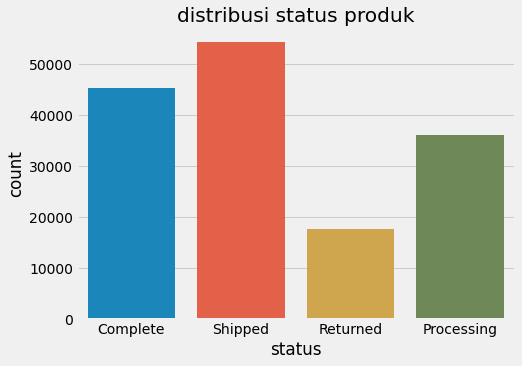

In [16]:
# plotting the distribution of price
plt.figure(figsize=(7,5))
sns.countplot(x='status', data=df_p)
plt.title('distribusi status produk')
plt.xlabel('status')

In [17]:
df_p['sale_price'].value_counts()

25.000000    5908
29.990000    2223
19.990000    2013
39.990002    1900
49.990002    1461
             ... 
46.880001       1
12.570000       1
52.330002       1
96.989998       1
65.750000       1
Name: sale_price, Length: 4179, dtype: int64

In [18]:
#melihat statistika dasar pada variabel harga jual/sale_price 
df_p[['sale_price']].describe()

,sale_price
count,153727.000000
mean,59.825846
std,66.063052
min,0.020000
25%,24.850000
50%,39.990002
75%,69.949997
max,999.000000


In [19]:
df_p[['sale']].describe()

,sale
count,153727.000000
mean,113.450811
std,155.553713
min,0.020000
25%,34.000000
50%,65.800003
75%,133.529999
max,3996.000000


**Categorical Description:** 

+ Most of the orders status are SHIPPED 
+ most user_id orders are 61518
+ Top gender is MALE
+ Most sale_price are $25.00

## 3 Data Visialization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


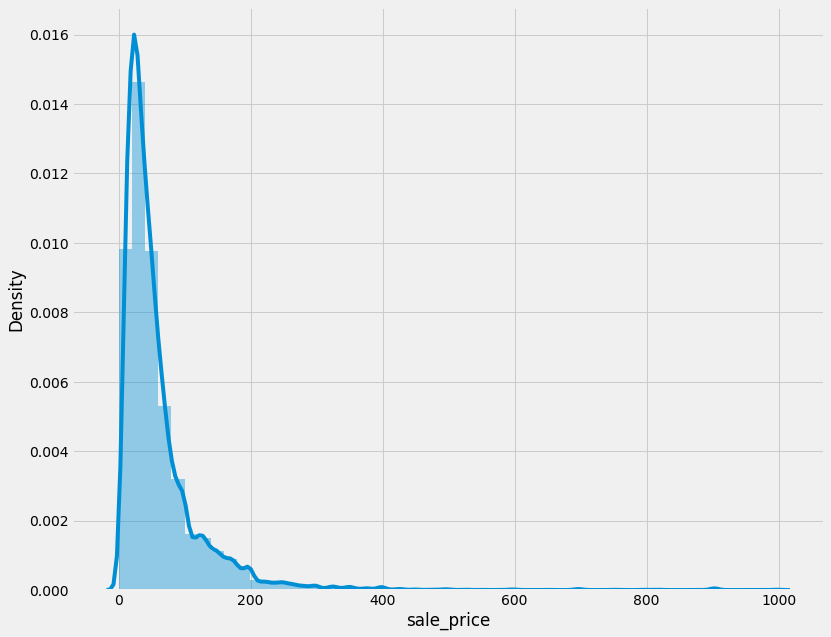

In [20]:
# sale_price Density Distribution - Central Tendency. 

plt.figure(figsize = [12,10])
sns.distplot(df_p['sale_price'], hist=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


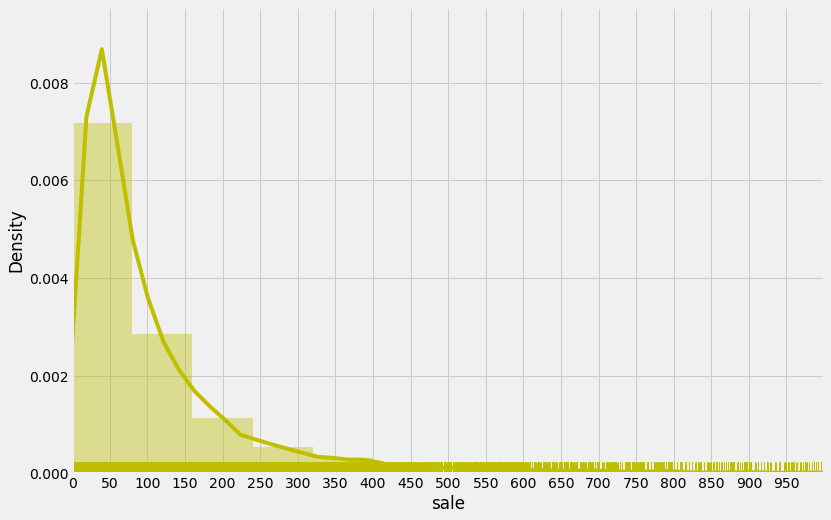

In [21]:
plt.figure(figsize=[12,8])
sns.distplot(df_p['sale'], rug=True, color = 'y')
plt.xlim(0,1000)
plt.xticks(range(0,1000,50))
plt.show()

Text(0.5, 0, 'Price')

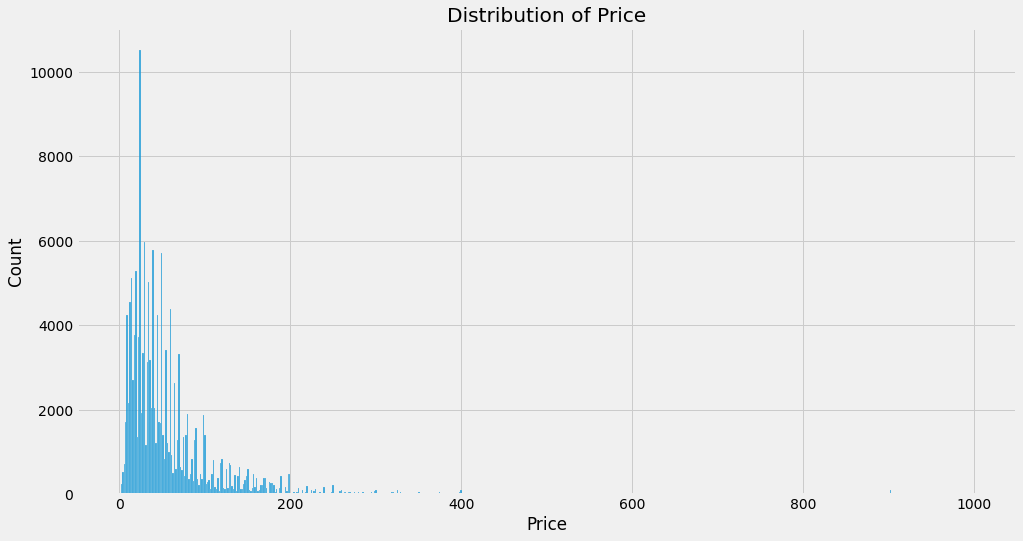

In [22]:
# plotting the distribution of price
plt.figure(figsize=(15,8))
sns.histplot(x='sale_price', data=df_p)
plt.title('Distribution of Price')
plt.xlabel('Price')

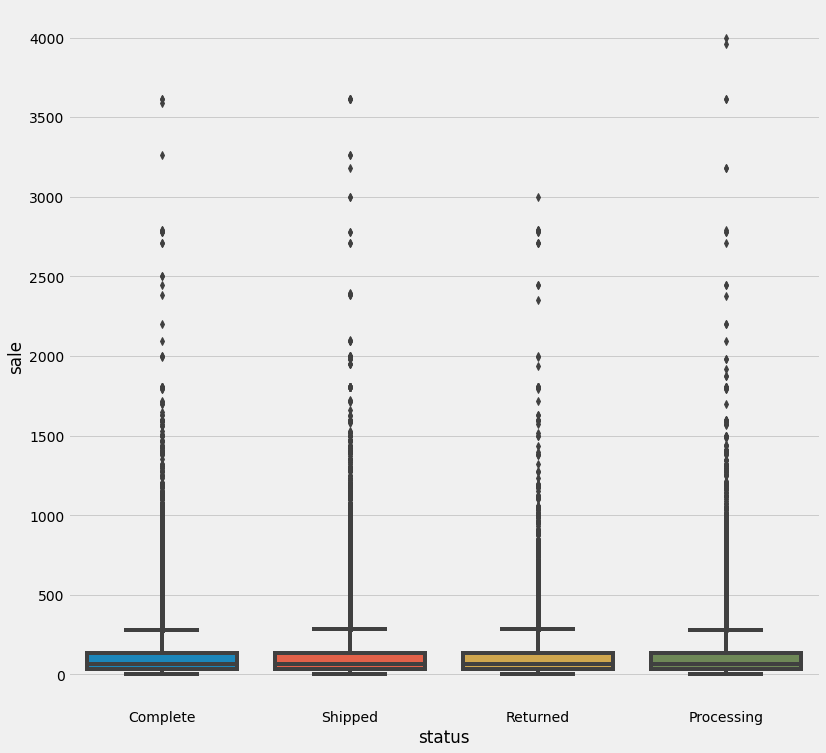

In [23]:
fig = plt.figure(figsize=(12,12))
sns.boxplot(x="status",y="sale", data=df_p)
plt.show()

In [24]:
df_p.groupby(['sale'])[['status']].describe()

status                        
         count unique         top freq
sale                                  
0.02         2      2     Shipped    1
0.04         2      2    Complete    1
0.49         2      2    Complete    1
0.98         2      2     Shipped    1
1.47         1      1  Processing    1
...        ...    ...         ...  ...
3260.00      3      2     Shipped    2
3592.00      1      1    Complete    1
3612.00      9      3     Shipped    5
3960.00      1      1  Processing    1
3996.00      1      1  Processing    1

[11017 rows x 4 columns]

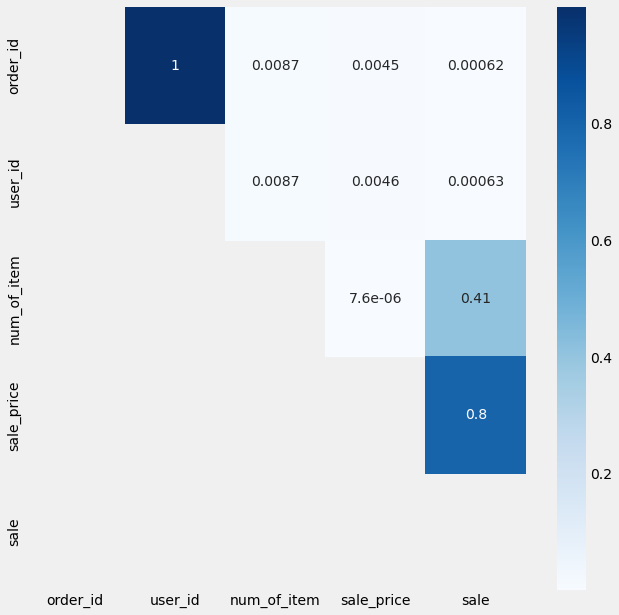

In [25]:
#codingan turun-temurun dari kak alvin
#corr kategori tinggi 0.75
# Create correlation matrix
corr_matrix = df_p.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

plt.figure(figsize=(10,10))
sns.heatmap(upper, annot=True, cmap='Blues')

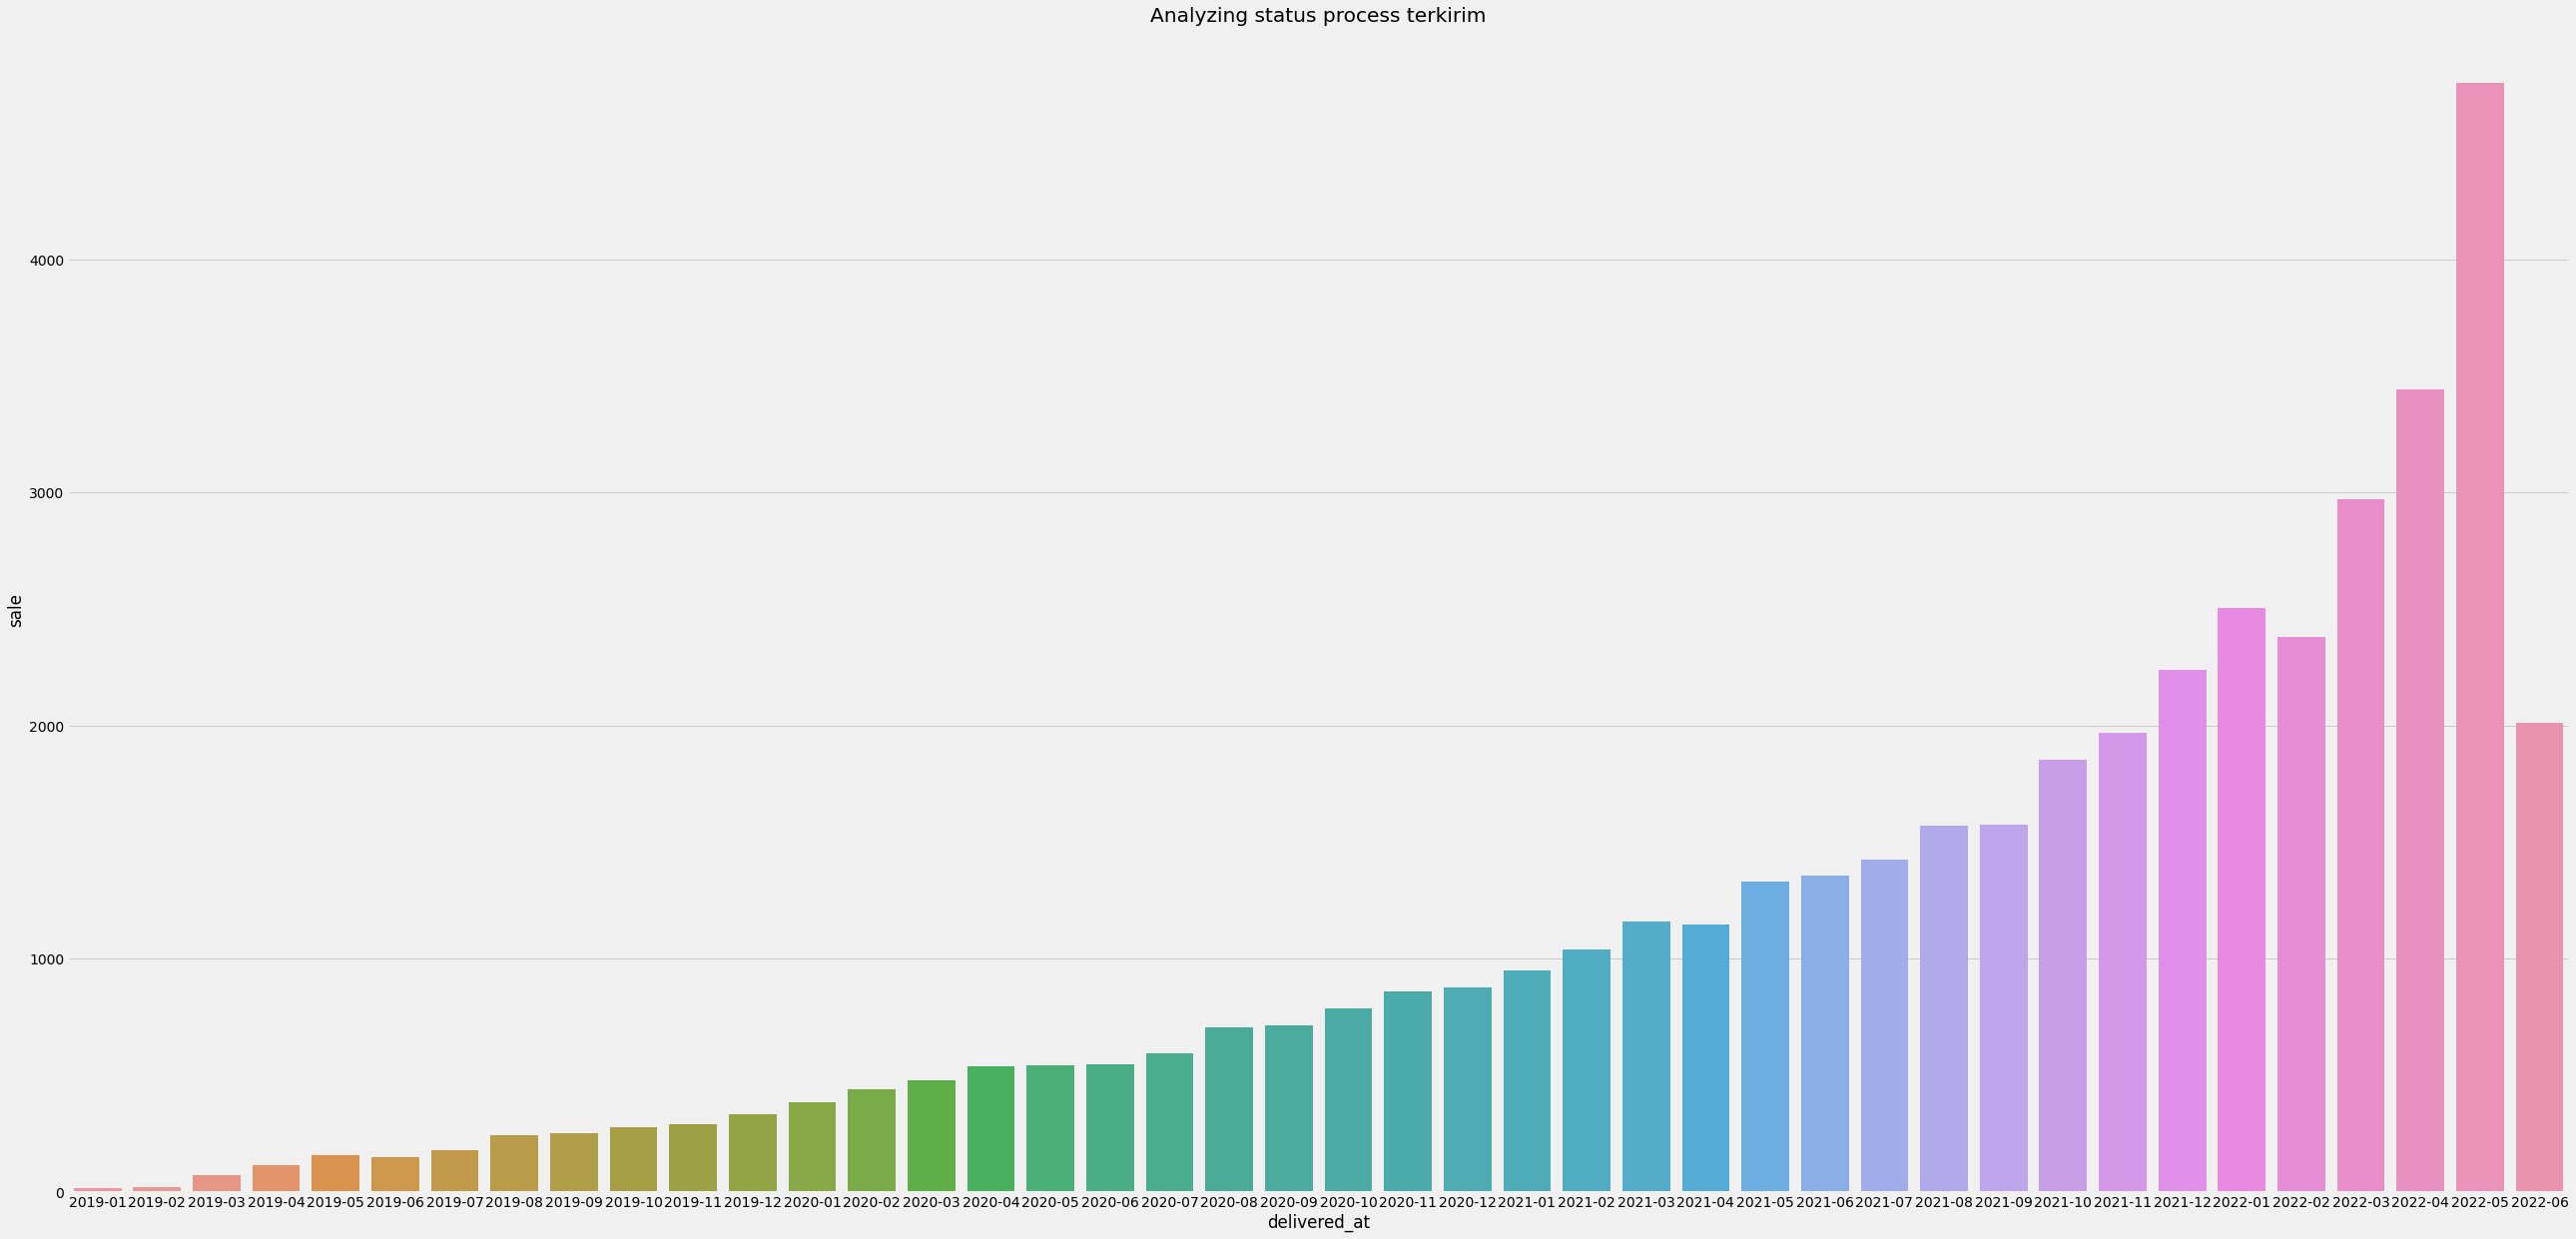

In [18]:
# analyzing the payment methods chosen by different customers
plt.figure(figsize=(40,20))
sns.countplot(x='delivered_at', data=df_f)
plt.title('Analyzing status process terkirim')
plt.xlabel('delivered_at')
plt.ylabel('sale')
plt.show()